In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df=pd.read_csv(r'C:\Users\tesla\OneDrive\Desktop\AI-Artificial-Inteligence-\ML practice\Feature Engineering\movies rating.csv')


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          200 non-null    int64 
 1   Rank                200 non-null    int64 
 2   Movie               196 non-null    object
 3   World Profit        200 non-null    object
 4   Gross               200 non-null    object
 5   National View       200 non-null    object
 6   Foreign Profit      200 non-null    object
 7   International View  200 non-null    object
dtypes: int64(2), object(6)
memory usage: 12.6+ KB


In [113]:
st =[  'Gross', 'Foreign Profit']
flt=['International View', 'National View']

In [115]:
for i in st:
       df[i]=df[i].str.replace(r'[$,]', '', regex=True).str.replace('%', '', regex=True).replace('-', data[i].mean()).astype(int)

In [116]:
df.describe()

,Unnamed: 0,Rank,Gross,National View,Foreign Profit,International View
count,200.000000,200.000000,2.000000e+02,200.000000,2.000000e+02,200.000000
mean,99.500000,100.500000,5.494907e+07,42.600185,5.864202e+07,69.693030
std,57.879185,57.879185,9.093195e+07,23.545917,1.240156e+08,30.438853
min,0.000000,1.000000,6.072000e+04,0.600000,1.584800e+04,0.100000
25%,49.750000,50.750000,1.282790e+07,31.673000,9.776965e+06,46.800000
50%,99.500000,100.500000,4.085433e+07,31.673000,1.811200e+07,70.150000
75%,149.250000,150.250000,4.085433e+07,54.175000,5.064149e+07,100.000000
max,199.000000,200.000000,6.529802e+08,100.000000,1.045884e+09,100.000000


In [117]:
data=df[['Rank', 'Gross', 'National View', 'Foreign Profit', 'International View']]

In [118]:
df[['Rank', 'Gross', 'National View', 'Foreign Profit', 'International View']].head(2)

,Rank,Gross,National View,Foreign Profit,International View
0,1,652980194,38.4,1045883622,61.6
1,2,636745858,47.6,701327787,52.4


In [119]:
data.head(2)

,Rank,Gross,National View,Foreign Profit,International View
0,1,652980194,38.4,1045883622,61.6
1,2,636745858,47.6,701327787,52.4


c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tesla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 100x100 with 0 Axes>

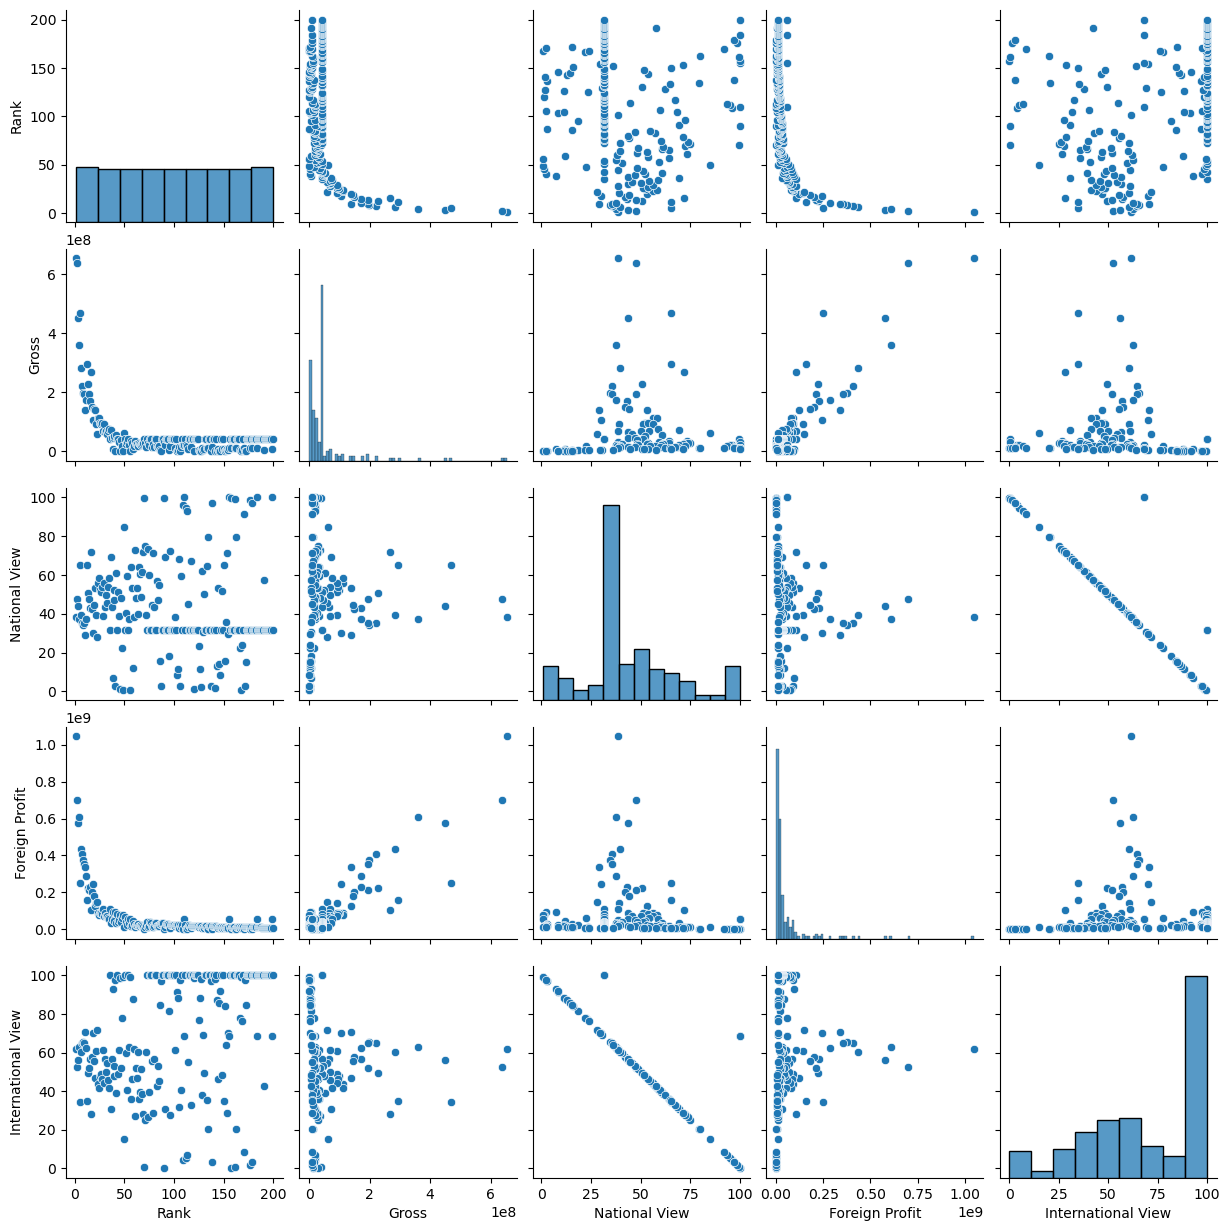

In [208]:
#['Rank', 'Gross', 'National View', 'Foreign Profit', 'International View']
plt.figure(figsize=((1,1)))
sns.pairplot(data)



In [196]:
X=data[['Rank', 'Gross', 'Foreign Profit', 'International View']]
y=data.iloc[:,2:3]

In [197]:
y

,National View
0,38.400
1,47.600
2,43.800
3,37.300
4,65.400
...,...
195,31.673
196,31.673
197,31.673
198,100.000


In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [199]:
ss=StandardScaler()
ss.fit(X_train)
X_train_S=ss.fit_transform(X_train)
y_train_S=ss.fit_transform(y_train)
X_test_S=ss.fit_transform(X_test)
y_test_S=ss.fit_transform(y_test)

In [200]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lrs=LinearRegression()
lr.fit(X_train,y_train)
lrs.fit(X_train_S,y_train_S)


LinearRegression()

In [201]:
print(lr.score(X_test,y_test))
print(lrs.score(X_test_S,y_test_S))
print(lr.score(X_train,y_train))
print(lrs.score(X_train_S,y_train_S))


0.6029593050732657
0.587286794870316
0.7933683566776744
0.7933683566776744


In [202]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rfs=RandomForestRegressor()
rf.fit(X_train,y_train)
rfs.fit(X_train_S,y_train_S)

C:\Users\tesla\AppData\Local\Temp\ipykernel_21552\3607846806.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)
C:\Users\tesla\AppData\Local\Temp\ipykernel_21552\3607846806.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfs.fit(X_train_S,y_train_S)


RandomForestRegressor()

In [203]:
print(rf.score(X_test,y_test))
print(rfs.score(X_test_S,y_test_S))

0.9793059135559568
0.541255626056103


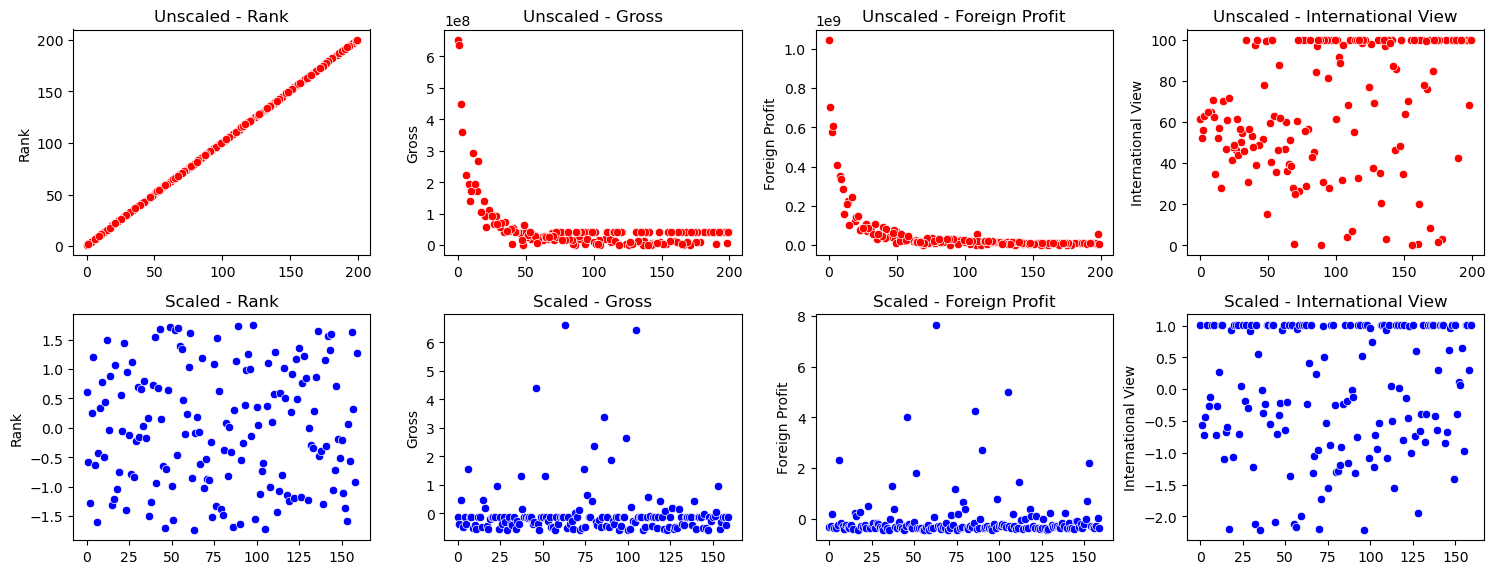

In [224]:
Scaled = pd.DataFrame(X_train_S,columns=['Rank', 'Gross', 'Foreign Profit', 'International View'])
unScaled = pd.DataFrame(X_train,columns=['Rank', 'Gross', 'Foreign Profit', 'International View'])
fig, axes = plt.subplots(nrows=2, ncols=len(Scaled.columns), figsize=(15, 6))

for idx, col in enumerate(Scaled.columns):
    # Unscaled Data Plot (Top Row)
    sns.scatterplot(x=unScaled.index, y=unScaled[col], ax=axes[0, idx], color='red')
    axes[0, idx].set_title(f'Unscaled - {col}')

    # Scaled Data Plot (Bottom Row)
    sns.scatterplot(x=Scaled.index, y=Scaled[col], ax=axes[1, idx], color='blue')
    axes[1, idx].set_title(f'Scaled - {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=((1,1)))
sns.pairplot(X_train)

In [235]:
Scaled['International View'].mean()

5.551115123125783e-17

In [236]:
Scaled.describe()

,Rank,Gross,Foreign Profit,International View
count,1.600000e+02,160.000000,160.000000,1.600000e+02
mean,-3.330669e-17,0.000000,0.000000,5.551115e-17
std,1.003140e+00,1.003140,1.003140,1.003140e+00
min,-1.737871e+00,-0.589065,-0.444516,-2.215059e+00
25%,-8.471050e-01,-0.434541,-0.369615,-7.164669e-01
50%,-4.409948e-02,-0.138925,-0.302810,3.242513e-02
75%,8.466662e-01,-0.138925,-0.134015,1.013175e+00
max,1.754984e+00,6.615635,7.658331,1.013175e+00
